In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=features)


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\33615\AppData\Local\Temp\ipykernel_13428\620923019.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
sil_scores = []
optimal_k=2
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")
    if score > sil_scores[optimal_k-2]: 
        optimal_k = k


D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=2: 0.3601
Silhouette score for k=3: 0.2575
Silhouette score for k=4: 0.2658


D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=5: 0.2878
Silhouette score for k=6: 0.2625
Silhouette score for k=7: 0.2918


D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=8: 0.2933
Silhouette score for k=9: 0.2894
Silhouette score for k=10: 0.2850


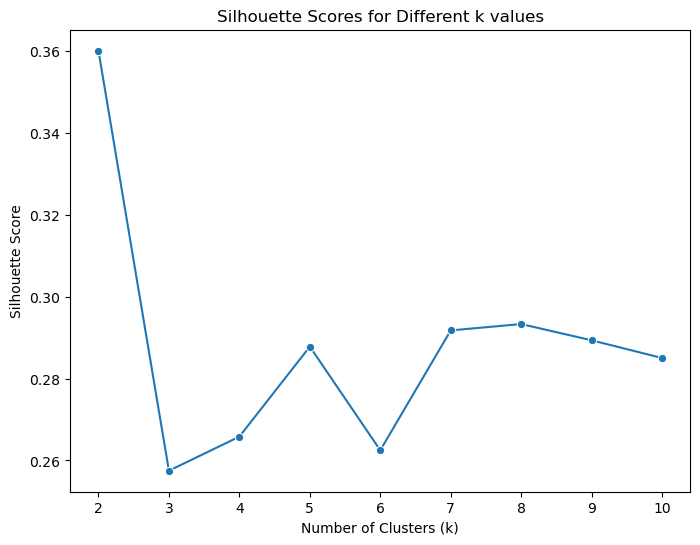

In [8]:
optimal_k = range(2, 11)[np.argmax(sil_scores)]
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2, 11), y=sil_scores, marker='o')
plt.title('Silhouette Scores for Different k values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.savefig(r'D:\桌面\数据挖掘\silhouette_scores1.png')
plt.show()

In [10]:
optimal_k = range(2, 11)[np.argmax(sil_scores)]
sns.lineplot(x=range(2, 11), y=sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')
plt.savefig('silhouette_scores.png')
plt.close()


In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
df = pd.DataFrame(X_scaled, columns=features)  # Use standardized data
df['Cluster'] = kmeans.fit_predict(X_scaled)

D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
print("\nCluster Means:")
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)




Cluster Means:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
Cluster                                                                         
0       -0.390124  0.262392 -0.620368  0.002912 -0.584675  0.243315 -0.435108   
1        0.725146 -0.487722  1.153113 -0.005412  1.086769 -0.452263  0.808760   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
Cluster                                                              
0        0.457222 -0.583801 -0.631460 -0.285808  0.326451 -0.446421  
1       -0.849865  1.085145  1.173731  0.531248 -0.606793  0.829787  


In [16]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df = X.copy()
df['Cluster'] = kmeans.fit_predict(X_scaled)

D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\nCentroids:")
print(centroids)



Centroids:
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.390124  0.262392 -0.620368  0.002912 -0.584675  0.243315 -0.435108   
1  0.725146 -0.487722  1.153113 -0.005412  1.086769 -0.452263  0.808760   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.457222 -0.583801 -0.631460 -0.285808  0.326451 -0.446421  
1 -0.849865  1.085145  1.173731  0.531248 -0.606793  0.829787  


In [20]:
means = X.mean() 
std_devs = X.std()  

In [22]:
difference = cluster_means - centroids
print("\nDifference between cluster means and centroids (original scale):")
print(difference)



Difference between cluster means and centroids (original scale):
                 CRIM            ZN         INDUS          CHAS           NOX  \
Cluster                                                                         
0        5.551115e-17 -1.110223e-16 -3.330669e-16  3.339343e-16 -1.110223e-16   
1       -2.220446e-16 -4.996004e-16 -1.110223e-15  2.437286e-16 -6.661338e-16   

                   RM           AGE           DIS           RAD           TAX  \
Cluster                                                                         
0        5.551115e-17 -5.551115e-17 -3.885781e-16  3.330669e-16 -1.110223e-16   
1        2.220446e-16 -3.330669e-16  1.110223e-16 -1.110223e-15 -3.996803e-15   

              PTRATIO             B         LSTAT  
Cluster                                            
0        0.000000e+00  2.775558e-16  0.000000e+00  
1       -1.443290e-15  1.110223e-16 -3.330669e-16  


In [24]:
print("\nCluster Means:")
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)



Cluster Means:
             CRIM         ZN      INDUS      CHAS       NOX        RM  \
Cluster                                                                 
0        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   
1        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
Cluster                                                                      
0        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   
1        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   

             LSTAT  
Cluster             
0         9.468298  
1        18.572768  


In [26]:
sse = kmeans.inertia_
print(f"\nTotal SSE: {sse:.4f}")



Total SSE: 4196.1593


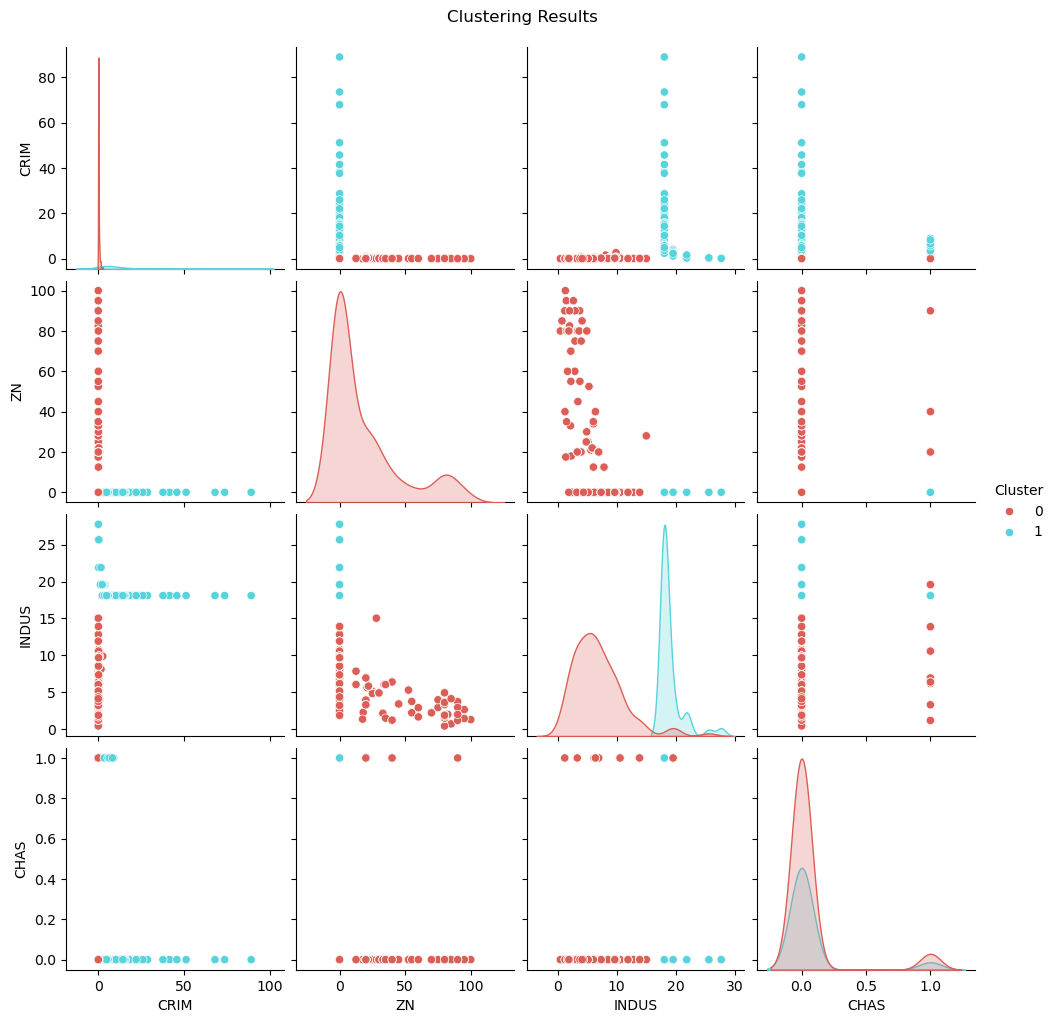

In [28]:
key_features = ['CRIM', 'ZN', 'INDUS', 'CHAS']
g = sns.pairplot(df, vars=key_features, hue='Cluster', palette='hls')
plt.suptitle('Clustering Results', y=1.02)
plt.savefig(r'D:\桌面\数据挖掘\cluster_pairplot1.png')
plt.show()


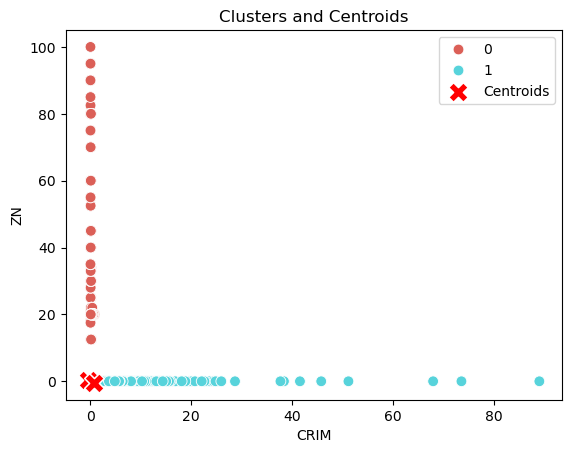

In [29]:
sns.scatterplot(data=df, x='CRIM', y='ZN', hue='Cluster', palette='hls', s=60)
sns.scatterplot(x=centroids['CRIM'], y=centroids['ZN'], color='red', s=200, marker='X', label='Centroids')
plt.title('Clusters and Centroids')
plt.savefig(r'D:\桌面\数据挖掘\clusters_centroids.png')
plt.show()
